### To je testni notebook za importe originalnega dataseta in pretvorbo podatkov

Za branje je potreben dataset, ki je na voljo na Kagglu (CSDS CS2 dataset)

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import structlog
from glob import glob
# from pureskillgg_dsdk.tome import TomeCuratorFs
from pureskillgg_dsdk.tome import create_tome_curator
import os
import time

pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 75)
pd.set_option("display.min_rows", 75)
# curator = TomeCuratorFs(log=log)


# This will stay up-to-date if the dataset changes.
csds_path=glob('archive/csds')[0].split('csds')[0]
#csds_path='D:/IOI_Short/archive/csds'
print(csds_path)
month_folders=glob(f'{csds_path}/csds/2023/*')
#month_folders=csds_path+'/2023/*'
print("months of data available:",[month.split('\\')[-1] for month in month_folders])
day_folders=glob(f'{csds_path}/csds/2023/12/*')
#day_folders=month_folders+'/12/*'
print("days of data available:",[day.split('\\')[-1] for day in day_folders])



#print(glob(f'{csds_path}/csds/2023/**',recursive=True)[:10])

os.environ['PURESKILLGG_TOME_DEFAULT_HEADER_NAME']='header_tome.2023-11-23,2023-11-26'
os.environ['PURESKILLGG_TOME_DS_TYPE']='csds'
os.environ['PURESKILLGG_TOME_COLLECTION_PATH']='./'
os.environ['PURESKILLGG_TOME_DS_COLLECTION_PATH']=csds_path

# This filters out logs for reading in files. Without this it would print a log for each match read in.
def filter_ds_reader_logs(_, __, event_dict):
    if event_dict.get("client") == "ds_reader_fs":
        raise structlog.DropEvent
    return event_dict

log = structlog.wrap_logger(structlog.get_logger(), processors=[filter_ds_reader_logs])

# The curator is our interface to the tomes
curator = create_tome_curator(log=log)

header_loader = curator.get_header_loader()
if not header_loader.exists:
    header_loader = curator.create_header_tome()

header_tome=header_loader.get_dataframe()
header_tome.head(20)


archive/
months of data available: ['12']
days of data available: ['10', '11', '12', '13', '14']
2026-01-15 21:23:52 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 21:23:52 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 21:23:52 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./


,magic,network_protocol,server_name,client_name,map_name,game_directory,fullpackets_version,allow_clientside_entities,allow_clientside_particles,addons,demo_version_name,demo_version_guid,build_num,game,tick_rate,tick_save_rate,platform,demo_id,sharecode,match_type,match_date,rushb_version,ppp_version,t_starters_avg_rank,t_starters_avg_wins,ct_starters_avg_rank,ct_starters_avg_wins,t_starters_score_final,ct_starters_score_final,providence,number_of_points,key,match_id
0,PBDEMS2,13980,Valve Counter-Strike 2 eu_north Server (srcds1...,SourceTV Demo,de_inferno,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-09T18:26:31.000Z,2.1.0,6.6.0,3.75,36.00,3.750000,36.000000,7,10,auto,8156369,csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43...,a0589e0e-1636-46b5-a935-58ba43367b22
1,PBDEMS2,13980,Valve Counter-Strike 2 us_north_central Server...,SourceTV Demo,de_overpass,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-10T04:51:04.000Z,2.1.0,6.6.0,5845.70,44.50,5845.700000,44.500000,14,8,auto,60551100,csds/2023/12/10/c825d5d6-054f-4ce1-ae9c-063db7...,c825d5d6-054f-4ce1-ae9c-063db7e9c5ee
2,PBDEMS2,13980,Valve Counter-Strike 2 us_southwest Server (sr...,SourceTV Demo,de_mirage,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-11T00:28:58.000Z,2.1.0,6.6.0,0.00,0.00,0.000000,0.000000,14,8,auto,64478461,csds/2023/12/11/c19bf88b-2b74-4312-9814-822ad2...,c19bf88b-2b74-4312-9814-822ad2a0b5e4
3,PBDEMS2,13980,Valve Counter-Strike 2 new_york Server (srcds1...,SourceTV Demo,de_ancient,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-13T17:30:23.000Z,2.1.0,6.6.0,6011.00,19.30,6011.000000,19.300000,9,14,auto,60752300,csds/2023/12/13/e656d592-8459-4f18-a4f7-d80200...,e656d592-8459-4f18-a4f7-d802008065c0
4,PBDEMS2,13980,Valve Counter-Strike 2 eu_west Server (srcds10...,SourceTV Demo,de_inferno,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-11T00:52:37.000Z,2.1.0,6.6.0,1.00,50.50,1.000000,50.500000,8,10,auto,8606294,csds/2023/12/11/cc9de4cc-ee25-4e3b-bba1-d49a46...,cc9de4cc-ee25-4e3b-bba1-d49a46aea52a
5,PBDEMS2,13980,Valve Counter-Strike 2 india Server (srcds1003...,SourceTV Demo,de_mirage,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-09T17:43:12.000Z,2.1.0,6.6.0,0.00,0.00,0.000000,0.000000,13,12,auto,84855141,csds/2023/12/11/36f637d1-2f16-4958-8798-83474b...,36f637d1-2f16-4958-8798-83474bd75569
6,PBDEMS2,13973,Valve Counter-Strike 2 us_north_central Server...,SourceTV Demo,de_vertigo,/opt/srcds/cs2/csgo_v2000202/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-11-25T18:39:17.000Z,2.1.0,6.6.0,8778.10,65.40,8778.100000,65.400000,14,11,auto,43827696,csds/2023/12/10/52ac4a3f-7141-4239-8cb2-82c275...,52ac4a3f-7141-4239-8cb2-82c275455275
7,PBDEMS2,13980,Valve Counter-Strike 2 us_southwest Server (sr...,SourceTV Demo,de_inferno,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-13T03:40:41.000Z,2.1.0,6.6.0,9941.90,62.50,9941.900000,62.500000,14,11,auto,87996806,csds/2023/12/13/2cf11cc3-f476-490e-8358-763470...,2cf11cc3-f476-490e-8358-763470fc5970
8,PBDEMS2,13980,Valve Counter-Strike 2 new_york Server (srcds1...,SourceTV Demo,de_overpass,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,2

Koliko je matchev za posamezno mapo

In [17]:
map_counts = header_tome['map_name'].value_counts()
target_maps = ['de_dust2', 'de_mirage', 'de_inferno']

# Filter the counts to show only the target maps
# We use .isin() on the index to filter the Series
display(map_counts[map_counts.index.isin(target_maps)])

map_name
de_inferno    349
de_mirage     270
de_dust2      108
Name: count, dtype: int64

In [18]:
# Create 3 subsets
dust2_matches = header_tome[header_tome['map_name'] == 'de_dust2']
mirage_matches = header_tome[header_tome['map_name'] == 'de_mirage']
inferno_matches = header_tome[header_tome['map_name'] == 'de_inferno']

# Verify the number of matches in each subset
print(f"Dust2 matches: {len(dust2_matches)}")
print(f"Mirage matches: {len(mirage_matches)}")
print(f"Inferno matches: {len(inferno_matches)}")

# Display the first few rows of the Dust2 subset as an example
dust2_matches.head()

Dust2 matches: 108
Mirage matches: 270
Inferno matches: 349


,magic,network_protocol,server_name,client_name,map_name,game_directory,fullpackets_version,allow_clientside_entities,allow_clientside_particles,addons,demo_version_name,demo_version_guid,build_num,game,tick_rate,tick_save_rate,platform,demo_id,sharecode,match_type,match_date,rushb_version,ppp_version,t_starters_avg_rank,t_starters_avg_wins,ct_starters_avg_rank,ct_starters_avg_wins,t_starters_score_final,ct_starters_score_final,providence,number_of_points,key,match_id
18,PBDEMS2,13980,Valve Counter-Strike 2 us_east Server (srcds20...,SourceTV Demo,de_dust2,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-13T01:42:52.000Z,2.1.0,6.6.0,0.0,0.0,0.0,0.0,12,13,auto,70605763,csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9...,285adbd2-ef84-4caa-b358-a100f9d05767
21,PBDEMS2,13980,Valve Counter-Strike 2 india Server (srcds1021...,SourceTV Demo,de_dust2,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-12T21:04:46.000Z,2.1.0,6.6.0,0.0,0.0,0.0,0.0,9,14,auto,56877754,csds/2023/12/12/c41d54dd-4109-441d-9f35-6e3af7...,c41d54dd-4109-441d-9f35-6e3af7dc20e4
25,PBDEMS2,13980,Valve Counter-Strike 2 hong_kong Server (srcds...,SourceTV Demo,de_dust2,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-13T16:17:32.000Z,2.1.0,6.6.0,0.0,0.0,0.0,0.0,14,11,auto,83012175,csds/2023/12/13/25446c45-ad7d-4339-8fa8-11ee24...,25446c45-ad7d-4339-8fa8-11ee249f5ebb
39,PBDEMS2,13980,Valve Counter-Strike 2 japan Server (srcds1010...,SourceTV Demo,de_dust2,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-12T13:04:51.000Z,2.1.0,6.6.0,0.0,0.0,0.0,0.0,9,14,auto,80246852,csds/2023/12/12/def002c5-6626-4eef-af88-831e32...,def002c5-6626-4eef-af88-831e3265488f
66,PBDEMS2,13980,Valve Counter-Strike 2 eu_west Server (srcds10...,SourceTV Demo,de_dust2,/opt/srcds/cs2/csgo_v2000211/csgo,2,True,True,,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,9842,csgo,64,21,steam,redacted,redacted,competitive,2023-12-09T14:29:43.000Z,2.1.0,6.6.0,0.0,0.0,0.0,0.0,11,14,auto,85186105,csds/2023/12/11/e3b504ae-7057-46ab-ab19-a8cc9f...,e3b504ae-7057-46ab-ab19-a8cc9f6a1193


Preberi en match

In [19]:
# 1. Get the original index of the first dust2 match
first_dust2_index = dust2_matches.index[0]

# 2. Use that index to load the match from the curator
dust2_loader = curator.get_match_by_index(first_dust2_index)

# 3. Get the manifest and data just like before
manifest_dust2 = dust2_loader.manifest
print(manifest_dust2)

data_dust2 = dust2_loader.get_channels()

2026-01-15 21:24:50 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 21:24:50 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 21:24:50 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 21:24:50 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
{'id': '285adbd2-ef84-4caa-b358-a100f9d05767', 'type': 'csds', 'jobId': '285adbd2-ef84-4caa-b358-a100f9d05767', 'game': 'csgo', 'platform': 'steam', 'demoId': 'redacted', 'sharecode': 'redacted', 'matchType': 'competitive', 'matchDate': '2023-12-13T01:42+00:00', 'createdAt': '2023-12-13T03:46:53

### Podatki in export za bomb_state

In [27]:
data_dust2['bomb_state']

,round,tick,event_type,player_id,site_code,second,player_id_fixed,player_x_pos,player_y_pos,player_z_pos,player_x_vel,player_y_vel,player_z_vel,player_phi_ang,player_theta_ang,player_weapon_code,player_team_code
0,6,26686,bomb_planted,65288,99,416.968750,2,-1605.833374,2619.985107,4.538174,0.000000,0.00000,0.000000,94.492035,-112.600594,19,2
1,8,40684,bomb_planted,65286,99,635.687500,9,-1684.585571,2551.004150,7.120536,0.000000,0.00000,0.000000,94.503021,40.274506,35,2
2,11,61145,bomb_planted,65285,99,955.390625,7,-1694.994873,2543.033203,8.178890,0.000000,0.00000,0.000000,86.563339,-27.588730,7,2
3,11,63769,bomb_exploded,65285,99,996.390625,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
4,13,72789,bomb_planted,65283,98,1137.328125,5,1100.464478,2585.731689,96.342529,0.000000,0.00000,0.000000,138.180206,-65.265999,4,2
5,21,120325,bomb_planted,65283,99,1880.078125,5,-1630.807129,2599.387695,3.576507,0.000000,0.00000,0.000000,116.839935,-13.020172,7,2
6,21,122949,bomb_exploded,65283,99,1921.078125,5,-1878.822510,-526.412292,109.590721,-55.484375,-207.71875,27.655273,91.815155,75.034561,7,2
7,22,129310,bomb_planted,65284,98,2020.468750,8,1133.076782,2520.234619,96.017700,0.000000,0.00000,0.000000,88.570068,-98.164558,7,2


In [33]:
import pandas as pd
import numpy as np

# --- CONFIGURATION ---
DUST2_X_BOUNDARY = -600 

def determine_site(row):
    """
    Determines Bomb Site (A/B) based on player coordinates for Dust 2.
    Returns np.nan for missing coordinates to allow forward filling later.
    """
    # Check for NaN or effectively empty coordinates
    if pd.isna(row['player_x_pos']) or row['player_x_pos'] == 0:
        return np.nan
        
    if row['player_x_pos'] < DUST2_X_BOUNDARY:
        return 'B'
    else:
        return 'A'

all_bomb_data = []

# Loop through the indices of your matches
for match_num, original_index in enumerate(dust2_matches.index):
    try:
        match_loader = curator.get_match_by_index(original_index)
        
        data = match_loader.get_channels(
            channel_instructions=[{"channel": "bomb_state"}]
        )
        
        df = data['bomb_state'][['round', 'tick', 'event_type', 'player_id', 'site_code', 'player_x_pos', 'player_y_pos']].copy()
        df['match_number'] = match_num + 1
        all_bomb_data.append(df)

    except Exception as e:
        print(f"Skipping match index {original_index}: {e}")

# 5. Combine and Filter
final_bomb_df = pd.concat(all_bomb_data, ignore_index=True)

# Keep valid players (optional, depending on if you want to keep 'world' entities for explosions)
# Usually explosions are not attributed to a player_id, so filtering by ID might actually DELETE the explosion event.
# SAFETY: Let's only filter IDs for events that AREN'T explosions/defusals if needed, 
# or just allow all IDs for the bomb dataframe to be safe.
# final_bomb_df = final_bomb_df[final_bomb_df['player_id'] >= 10] 

# 6. --- INITIAL LABELING ---
# Apply coordinate logic. Plants/Defuses usually have coords. Explosions do not.
final_bomb_df['site'] = final_bomb_df.apply(determine_site, axis=1)

# 7. --- FIX FOR BOMB_EXPLODED ---
# 1. Sort by Match -> Round -> Tick to ensure chronological order
final_bomb_df = final_bomb_df.sort_values(by=['match_number', 'round', 'tick'])

# 2. Group by Match and Round, then Forward Fill (ffill) the 'site' column.
# This takes the 'site' from the 'bomb_planted' event and copies it down to 'bomb_exploded'
final_bomb_df['site'] = final_bomb_df.groupby(['match_number', 'round'])['site'].ffill()

# 8. Clean up
# Drop columns you don't need anymore
final_bomb_df = final_bomb_df[final_bomb_df['player_id'] >= 10]
final_bomb_df = final_bomb_df[final_bomb_df['player_id'] <= 65289]
final_bomb_df.drop(columns=['site_code', 'player_x_pos', 'player_y_pos'], inplace=True)


final_bomb_df

2026-01-15 22:02:02 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 22:02:02 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 22:02:02 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 22:02:02 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 22:02:02 [info     ] Read parquet Channel: Start    channel=bomb_state client=ds_reader_fs columns=None manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 22:02:02 [info     ] Read Manifest: Start           client=tome_reader_fs manife

,round,tick,event_type,player_id,match_number,site
0,6,26686,bomb_planted,65288,1,B
1,8,40684,bomb_planted,65286,1,B
2,11,61145,bomb_planted,65285,1,B
3,11,63769,bomb_exploded,65285,1,B
4,13,72789,bomb_planted,65283,1,A
5,21,120325,bomb_planted,65283,1,B
6,21,122949,bomb_exploded,65283,1,B
7,22,129310,bomb_planted,65284,1,A
8,2,11837,bomb_planted,65287,2,A
9,2,13754,bomb_defused,65284,2,A


In [35]:
import pandas as pd
import numpy as np

# --- CONFIGURATION FOR MIRAGE ---
# Mirage is best split by the Y-axis.
# A Site is generally South (Y < -600)
# B Site is generally North (Y > -600)
MIRAGE_Y_BOUNDARY = -600 

def determine_mirage_site(row):
    """
    Determines Bomb Site (A/B) based on player coordinates for Mirage.
    Returns np.nan for missing coordinates to allow forward filling later.
    """
    # Check for NaN or effectively empty coordinates
    if pd.isna(row['player_y_pos']) or row['player_y_pos'] == 0:
        return np.nan
        
    if row['player_y_pos'] < MIRAGE_Y_BOUNDARY:
        return 'A'
    else:
        return 'B'

all_bomb_data = []

# Loop through the indices of your matches (Switching to mirage_matches)
for match_num, original_index in enumerate(mirage_matches.index):
    try:
        # 1. Load match data
        match_loader = curator.get_match_by_index(original_index)
        
        # We need the 'bomb_state' channel
        data = match_loader.get_channels(
            channel_instructions=[
                {"channel": "bomb_state"}
            ]
        )
        
        # 2. Filter columns immediately
        df = data['bomb_state'][['round', 'tick', 'event_type', 'player_id', 'site_code', 'player_x_pos', 'player_y_pos']].copy()
        
        # 3. Add the Match Number column (starting at 1)
        df['match_number'] = match_num + 1
        
        # 4. Append to list
        all_bomb_data.append(df)

    except Exception as e:
        print(f"Skipping match index {original_index} due to error: {e}")

# 5. Combine everything into one giant DataFrame
final_bomb_df = pd.concat(all_bomb_data, ignore_index=True)

# 6. Filter Player IDs (Standard cleanup)
final_bomb_df = final_bomb_df[
    (final_bomb_df['player_id'] >= 10) & 
    (final_bomb_df['player_id'] <= 65289)
]

# 7. --- LABEL SITES (MIRAGE LOGIC) ---
# Apply the Y-axis check
final_bomb_df['site'] = final_bomb_df.apply(determine_mirage_site, axis=1)

# 8. --- FIX FOR BOMB_EXPLODED ---
# Sort to ensure chronological order
final_bomb_df = final_bomb_df.sort_values(by=['match_number', 'round', 'tick'])

# Forward fill the site from 'plant' to 'explode'/'defuse'
final_bomb_df['site'] = final_bomb_df.groupby(['match_number', 'round'])['site'].ffill()

# 9. Clean up
# Drop old site_code
final_bomb_df = final_bomb_df[final_bomb_df['player_id'] >= 10]
final_bomb_df = final_bomb_df[final_bomb_df['player_id'] <= 65289]
final_bomb_df.drop(columns=['site_code', 'player_x_pos', 'player_y_pos'], inplace=True)

final_bomb_df

2026-01-15 22:05:44 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 22:05:44 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 22:05:44 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/11/c19bf88b-2b74-4312-9814-822ad2a0b5e4/csds root_path=archive/
2026-01-15 22:05:44 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/11/c19bf88b-2b74-4312-9814-822ad2a0b5e4/csds root_path=archive/
2026-01-15 22:05:44 [info     ] Read parquet Channel: Start    channel=bomb_state client=ds_reader_fs columns=None manifest_key=csds/2023/12/11/c19bf88b-2b74-4312-9814-822ad2a0b5e4/csds root_path=archive/
2026-01-15 22:05:44 [info     ] Read Manifest: Start           client=tome_reader_fs manife

,round,tick,event_type,player_id,match_number,site
0,2,8236,bomb_planted,65289,1,B
1,3,13933,bomb_planted,65285,1,B
2,3,16557,bomb_exploded,65285,1,B
3,7,36869,bomb_planted,65289,1,B
4,7,39493,bomb_exploded,65289,1,B
5,8,45354,bomb_planted,65285,1,B
6,9,49033,bomb_planted,65287,1,A
7,10,53681,bomb_planted,65288,1,B
8,10,56305,bomb_exploded,65288,1,B
9,12,64278,bomb_planted,65288,1,A


In [36]:
import pandas as pd
import numpy as np

# --- CONFIGURATION FOR INFERNO ---
# Inferno is best split by the Y-axis.
# B Site is "Top" / North (Y > 1500)
# A Site is "Bottom" / South-East (Y <= 1500)
INFERNO_Y_BOUNDARY = 1500 

def determine_inferno_site(row):
    """
    Determines Bomb Site (A/B) based on player coordinates for Inferno.
    Returns np.nan for missing coordinates to allow forward filling later.
    """
    # Check for NaN or effectively empty coordinates
    if pd.isna(row['player_y_pos']) or row['player_y_pos'] == 0:
        return np.nan
        
    # On Inferno, B is the "North" site (High Y values)
    if row['player_y_pos'] > INFERNO_Y_BOUNDARY:
        return 'B'
    else:
        return 'A'

all_bomb_data = []

# Loop through the indices of your matches (Switching to inferno_matches)
for match_num, original_index in enumerate(inferno_matches.index):
    try:
        # 1. Load match data
        match_loader = curator.get_match_by_index(original_index)
        
        # We need the 'bomb_state' channel
        data = match_loader.get_channels(
            channel_instructions=[
                {"channel": "bomb_state"}
            ]
        )
        
        # 2. Filter columns immediately
        df = data['bomb_state'][['round', 'tick', 'event_type', 'player_id', 'site_code', 'player_x_pos', 'player_y_pos']].copy()
        
        # 3. Add the Match Number column (starting at 1)
        df['match_number'] = match_num + 1
        
        # 4. Append to list
        all_bomb_data.append(df)

    except Exception as e:
        print(f"Skipping match index {original_index} due to error: {e}")

# 5. Combine everything into one giant DataFrame
final_bomb_df = pd.concat(all_bomb_data, ignore_index=True)

# 6. Filter Player IDs (Standard cleanup)
final_bomb_df = final_bomb_df[
    (final_bomb_df['player_id'] >= 10) & 
    (final_bomb_df['player_id'] <= 65289)
]

# 7. --- LABEL SITES (INFERNO LOGIC) ---
# Apply the Y-axis check (> 1500 = B)
final_bomb_df['site'] = final_bomb_df.apply(determine_inferno_site, axis=1)

# 8. --- FIX FOR BOMB_EXPLODED ---
# Sort to ensure chronological order: Match -> Round -> Tick
final_bomb_df = final_bomb_df.sort_values(by=['match_number', 'round', 'tick'])

# Forward fill the site from 'plant' to 'explode'/'defuse'
final_bomb_df['site'] = final_bomb_df.groupby(['match_number', 'round'])['site'].ffill()

# 9. Clean up
# Drop old site_code
final_bomb_df.drop(columns=['site_code', 'player_x_pos', 'player_y_pos'], inplace=True)

final_bomb_df

2026-01-15 22:07:46 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 22:07:46 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 22:07:46 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43367b22/csds root_path=archive/
2026-01-15 22:07:46 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43367b22/csds root_path=archive/
2026-01-15 22:07:46 [info     ] Read parquet Channel: Start    channel=bomb_state client=ds_reader_fs columns=None manifest_key=csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43367b22/csds root_path=archive/
2026-01-15 22:07:46 [info     ] Read Manifest: Start           client=tome_reader_fs manife

,round,tick,event_type,player_id,match_number,site
0,4,11913,bomb_planted,65283,1,A
1,4,13104,bomb_defused,65281,1,A
2,6,20345,bomb_planted,65282,1,A
3,6,21361,bomb_defused,65281,1,A
4,9,29766,bomb_planted,65280,1,A
5,2,4902,bomb_planted,65282,2,A
6,2,7182,bomb_defused,65280,2,A
7,3,14155,bomb_planted,65289,3,A
8,5,24897,bomb_planted,65287,3,A
9,5,27521,bomb_exploded,65287,3,B


### Player positions, export

In [38]:
# Select only the specific columns
filtered_df = data_dust2['player_vector'][['tick', 'round', 'player_id', 'x_pos', 'y_pos']]

# Display the result
filtered_df

,tick,round,player_id,x_pos,y_pos
4,4336,2,65280,334.368744,2433.733643
9,4336,2,65281,351.392120,2352.942383
6,4336,2,65282,160.122742,2369.676270
7,4336,2,65283,258.159393,2480.553711
0,4336,2,65284,182.249908,2439.011719
2,4336,2,65285,-760.662964,-836.174011
5,4336,2,65286,-1141.000000,-808.000000
3,4336,2,65287,-493.000000,-808.000000
8,4336,2,65288,-533.000000,-754.000000
1,4336,2,65289,-367.000000,-808.000000


In [8]:
import pandas as pd

# Configuration
INTERVAL = 64  # Sample every 64 ticks (approx 1 second)

# 1. Find the match start (offset)
# We subtract the first tick so the sampling starts exactly at the beginning of data (Relative Tick 0)
start_tick = filtered_df['tick'].min()

# 2. Create the mask using the actual Game Tick
# This handles gaps perfectly. If a player is dead at tick 6400, no row exists to check.
# When they spawn at tick 7000, we wait for tick 7040 (or whatever fits the modulo) to sample.
mask = (filtered_df['tick'] - start_tick) % INTERVAL == 0

# 3. Apply filter
sampled_df = filtered_df[mask].copy()

# 4. Sort (Optional, but good practice)
sampled_df = sampled_df.sort_values(by=['tick', 'player_id'])

# Verify
print(f"Original rows: {len(filtered_df)}")
print(f"Sampled rows:  {len(sampled_df)}")
sampled_df

Original rows: 786942
Sampled rows:  12304


,tick,round,player_id,x_pos,y_pos
4,4953,2,65280,-1902.000000,-1816.000000
0,4953,2,65281,-1552.000000,-1968.000000
8,4953,2,65282,-1598.000000,-1732.000000
9,4953,2,65283,-1972.000000,-1988.000000
1,4953,2,65284,-1976.000000,-1812.000000
2,4953,2,65285,1216.000000,-307.000000
7,4953,2,65286,1136.000000,32.000000
3,4953,2,65287,1296.000000,-160.000000
5,4953,2,65288,1376.000000,-208.000000
6,4953,2,65289,1376.000000,-16.000000


In [10]:
import pandas as pd
import numpy as np

# Configuration
# We sample every 64 ticks (approx 1 second)
# This uses the specific game tick to ensure synchronization across all players
INTERVAL = 64 

all_match_data = []

# Loop through the indices of your dust2_matches subset
for match_num, original_index in enumerate(inferno_matches.index):
    try:
        # 1. Load match data
        match_loader = curator.get_match_by_index(original_index)
        
        # We only need the 'player_vector' channel for positions
        data = match_loader.get_channels(
            channel_instructions=[
                {"channel": "player_vector"}
            ]
        )
        
        # 2. Filter columns immediately to save memory
        df = data['player_vector'][['tick', 'round', 'player_id', 'x_pos', 'y_pos']].copy()
        
        # 3. Apply Robust Time-Based Sampling
        # Find the start tick of THIS match to zero-out the clock
        start_tick = df['tick'].min()
        
        # Create a mask based on the GAME TICK, not the row index.
        # This handles dead players perfectly (no drift).
        mask = (df['tick'] - start_tick) % INTERVAL == 0
        
        subset = df[mask].copy()

        # Rounding for cleaner CSVs
        subset[['x_pos', 'y_pos']] = subset[['x_pos', 'y_pos']].round(2)
        
        # 4. Add the Match Number column (starting at 1)
        subset['match_number'] = match_num + 1
        
        all_match_data.append(subset)

    except Exception as e:
        print(f"Skipping match index {original_index} due to error: {e}")

# 5. Combine everything into one giant DataFrame
final_positions_df = pd.concat(all_match_data, ignore_index=True)

# 6. Filter out invalid IDs (Spectators/GOTV usually have low IDs or specific flags)
# Assuming standard players have IDs > 10 based on your example
final_positions_df = final_positions_df[final_positions_df['player_id'] >= 10]

print(f"Finished processing. Total rows: {len(final_positions_df)}")
final_positions_df

2026-01-15 14:51:56 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 14:51:56 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 14:51:56 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43367b22/csds root_path=archive/
2026-01-15 14:51:56 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43367b22/csds root_path=archive/
2026-01-15 14:51:56 [info     ] Read parquet Channel: Start    channel=player_vector client=ds_reader_fs columns=None manifest_key=csds/2023/12/10/a0589e0e-1636-46b5-a935-58ba43367b22/csds root_path=archive/
2026-01-15 14:51:56 [info     ] Read Manifest: Start           client=tome_reader_fs man

,tick,round,player_id,x_pos,y_pos,match_number
0,2809,2,65280,2336.00,608.00,1
1,2809,2,65281,2272.00,672.00,1
2,2809,2,65282,508.70,544.00,1
3,2809,2,65283,591.70,545.00,1
4,2873,2,65280,2336.00,608.00,1
5,2873,2,65281,2272.00,672.00,1
6,2873,2,65282,508.70,544.00,1
7,2873,2,65283,591.70,545.00,1
8,2937,2,65280,2336.00,608.00,1
9,2937,2,65281,2272.00,672.00,1


### Zmanjšaj .csv na 100 matchev

In [37]:
import pandas as pd
import os

# List of maps to process
maps = ["dust2", "mirage", "inferno"]

for map_name in maps:
    filename = f"{map_name}_bomb.csv"
    
    # Check if file exists before trying to load
    if os.path.exists(filename):
        print(f"Processing {filename}...")
        
        # 1. Load the CSV
        df = pd.read_csv(filename)
        
        # 2. Filter: Keep only matches where match_number is 101 or less
        # (Removes match_number > 101)
        initial_rows = len(df)
        df_filtered = df[df['match_number'] <= 100]
        removed_rows = initial_rows - len(df_filtered)
        
        # 3. Save the file back (overwriting the original)
        df_filtered.to_csv(filename, index=False)
        
        print(f"  -> Removed {removed_rows} rows. Kept matches 1-100.")
        print(f"  -> Saved to {filename}")
        
    else:
        print(f"Skipping {filename} (File not found)")

print("Done.")

Processing dust2_bomb.csv...
  -> Removed 120 rows. Kept matches 1-100.
  -> Saved to dust2_bomb.csv
Processing mirage_bomb.csv...
  -> Removed 2167 rows. Kept matches 1-100.
  -> Saved to mirage_bomb.csv
Processing inferno_bomb.csv...
  -> Removed 2733 rows. Kept matches 1-100.
  -> Saved to inferno_bomb.csv
Done.


### Filtriranje za AWP, export

In [13]:
# 1. Access and filter for AWP
df_item = data_dust2['item_equip']
awp_equips = df_item[df_item['item'] == 'awp']

# 2. Group by round and player_id, then find the minimum tick
# This gives the first time each player equipped an AWP per round
first_awp_equips = awp_equips.groupby(['round', 'player_id'])['tick'].min().reset_index()

# 3. Rename the column for clarity and display
first_awp_equips.columns = ['round', 'player_id', 'first_equip_tick']
display(first_awp_equips)

,round,player_id,first_equip_tick
0,5,65283,17550
1,8,65282,38349
2,8,65284,33191
3,8,65287,33204
4,9,65282,42661
5,10,65280,57536
6,10,65282,51795
7,10,65284,54315
8,10,65286,51929
9,11,65280,58188


In [39]:
import pandas as pd

all_awp_data = []

# Loop through the indices of your dust2_matches subset
for match_num, original_index in enumerate(dust2_matches.index):
    
    try:
        # 1. Load match data
        match_loader = curator.get_match_by_index(original_index)
        
        data = match_loader.get_channels(
            channel_instructions=[{"channel": "item_equip"}]
        )
        df_item = data['item_equip']
        
        # 2. Filter for AWP equips
        # Checking both 'awp' and 'weapon_awp' just to be safe across different data versions
        awp_equips = df_item[df_item['item'] == 'awp']
        
        if not awp_equips.empty:
            # 3. Group by round and player_id to find the first equip time per round
            first_equips = awp_equips.groupby(['round', 'player_id'])['tick'].min().reset_index()
            first_equips.columns = ['round', 'player_id', 'first_equip_tick']
            
            # 4. Add Match Number
            first_equips['match_number'] = match_num + 1
            
            all_awp_data.append(first_equips)
        
    except Exception as e:
        print(f"Skipping match {match_num + 1} due to error: {e}")
        continue

# 5. Merge all into one DataFrame

final_awp_df = pd.concat(all_awp_data, ignore_index=True)
print("Finished processing AWP data.")
final_awp_df


2026-01-15 23:17:39 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 23:17:39 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 23:17:39 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:17:39 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:17:39 [info     ] Read parquet Channel: Start    channel=item_equip client=ds_reader_fs columns=None manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:17:39 [info     ] Read Manifest: Start           client=tome_reader_fs manife

,round,player_id,first_equip_tick,match_number
0,5,65283,17550,1
1,8,65282,38349,1
2,8,65284,33191,1
3,8,65287,33204,1
4,9,65282,42661,1
5,10,65280,57536,1
6,10,65282,51795,1
7,10,65284,54315,1
8,10,65286,51929,1
9,11,65280,58188,1


In [54]:
final_awp_df = final_awp_df[final_awp_df['player_id'] >= 10]
final_awp_df

,round,player_id,first_equip_tick,match_number
0,6,65281,17498,1
1,7,65281,22633,1
2,8,65281,24347,1
3,5,65280,17769,2
4,6,65280,21128,2
5,6,65281,21049,2
6,7,65280,25362,2
7,7,65281,25501,2
8,8,65280,28151,2
9,8,65281,27987,2


### Razno, testni izrisi

In [42]:
player_df = filtered_df[filtered_df['player_id'].apply(str).str.contains("65280", regex=False, na=False, case=False)]

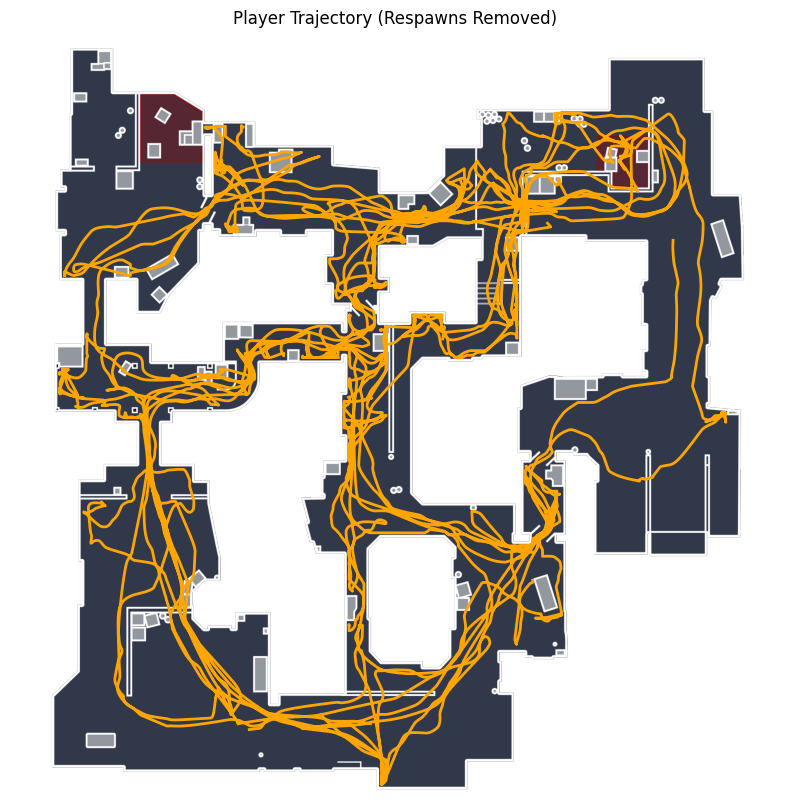

In [43]:
import numpy as np
import matplotlib.image as mpimg

map_img = mpimg.imread('img/de_dust2_radar.png') 

left_x = -2476
top_y = 3239
scale = 4.4

right_x = left_x + (1024 * scale)
bottom_y = top_y - (1024 * scale)

map_extent = [left_x, right_x, bottom_y, top_y]

diff_x = player_df['x_pos'].diff().abs()
diff_y = player_df['y_pos'].diff().abs()
dist = np.sqrt(diff_x**2 + diff_y**2)

jump_threshold = 250 

plot_df = player_df.copy()

jump_indices = dist[dist > jump_threshold].index

plot_df.loc[jump_indices, ['x_pos', 'y_pos']] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(map_img, extent=map_extent, zorder=0)

ax.plot(plot_df['x_pos'], plot_df['y_pos'], color='orange', linewidth=2, label='Trajectory', zorder=1)

ax.set_title('Player Trajectory (Respawns Removed)')
ax.set_xlim(map_extent[0], map_extent[1])
ax.set_ylim(map_extent[2], map_extent[3])
ax.axis('off')
plt.show()

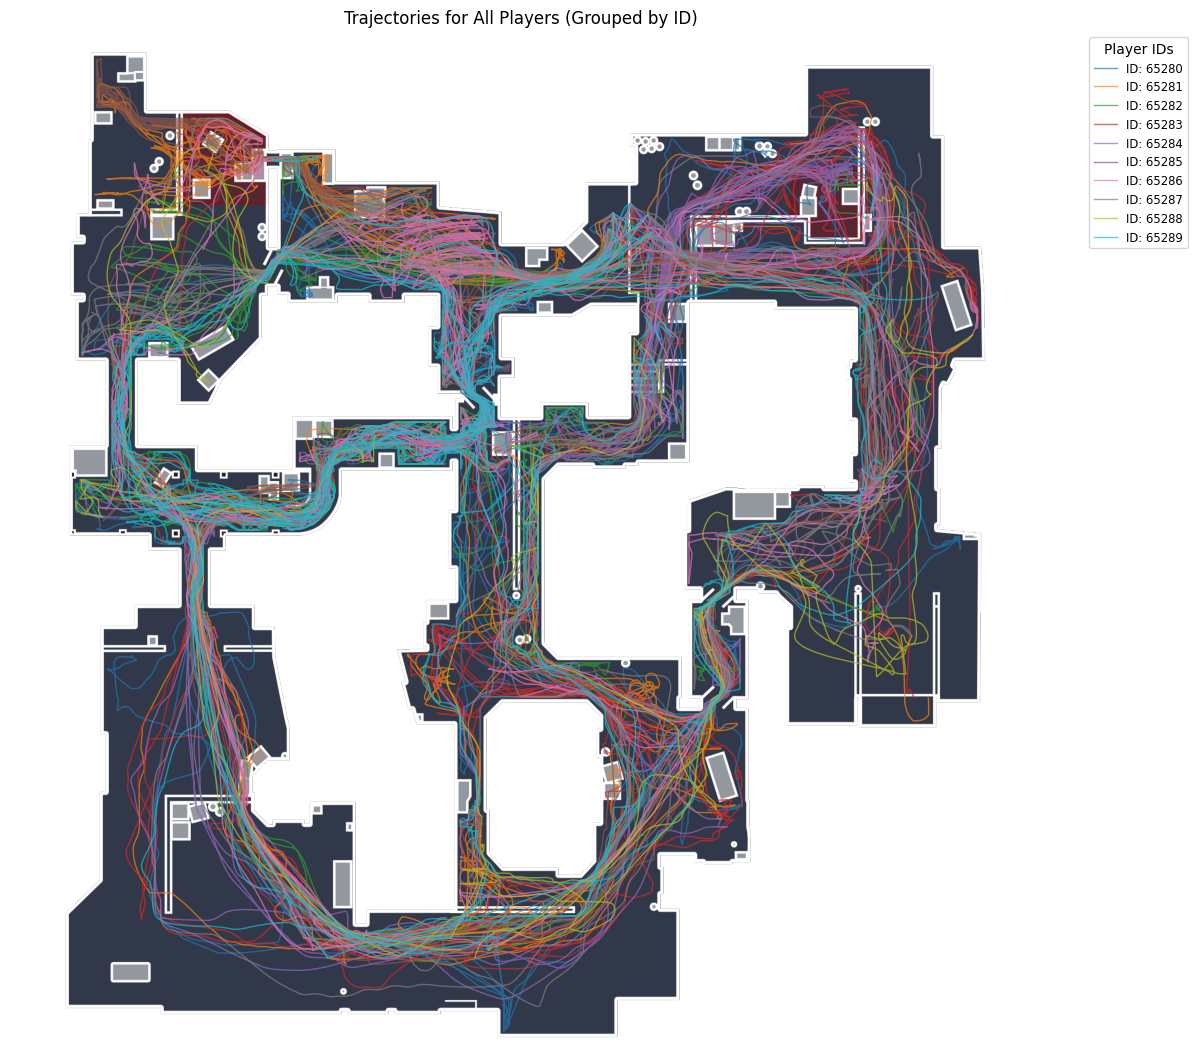

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(map_img, extent=map_extent, zorder=0)

unique_ids = filtered_df['player_id'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_ids)))

for i, pid in enumerate(unique_ids):
    p_data = filtered_df[filtered_df['player_id'] == pid].copy()
    
    diff_x = p_data['x_pos'].diff().abs()
    diff_y = p_data['y_pos'].diff().abs()
    dist = np.sqrt(diff_x**2 + diff_y**2)
    
    p_data.loc[dist > 250, ['x_pos', 'y_pos']] = np.nan


    ax.plot(
        p_data['x_pos'], 
        p_data['y_pos'], 
        color=colors[i % 10],
        linewidth=1, 
        alpha=0.7, 
        label=f'ID: {pid}'
    )

ax.set_title("Trajectories for All Players (Grouped by ID)")
ax.set_xlim(map_extent[0], map_extent[1])
ax.set_ylim(map_extent[2], map_extent[3])
ax.axis('off')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Player IDs", fontsize='small')
plt.tight_layout()
plt.show()

### Koda za flashbang, export

In [ ]:
data_dust2['player_blind'][['round', 'tick', 'player_id', 'attacker_id', 'blind_duration', 'player_x_pos', 'player_y_pos', 'player_z_pos']]

,round,tick,player_id,attacker_id,blind_duration,player_x_pos,player_y_pos,player_z_pos
0,2,6157,65284,65288,1.590294,1210.108521,2755.715820,105.979637
1,2,6157,65283,65288,2.606682,1762.812744,2074.065918,3.413785
2,4,14502,65289,65288,1.922945,317.371246,-87.417603,-3.437805
3,4,14502,65288,65288,2.183955,554.095825,41.103531,-4.582275
4,4,14502,65283,65288,2.274446,1425.579102,1430.189941,-8.463074
5,4,14725,65281,65286,0.631499,-1755.588745,2638.543457,66.031250
6,4,15305,65289,65287,0.532472,1219.758545,633.728577,8.333951
7,4,15305,65288,65287,2.935499,1463.637939,468.861786,-114.941711
8,4,15305,65284,65287,3.572704,826.324951,2520.057861,94.220741
9,5,18211,65282,65282,0.900686,-469.159180,2143.112549,-126.337891


In [ ]:
import pandas as pd

all_blind_data = []

for match_num, original_index in enumerate(dust2_matches.index):
    try:
        match_loader = curator.get_match_by_index(original_index)
        data = match_loader.get_channels(
            channel_instructions=[{"channel": "player_blind"}]
        )
        
        if 'player_blind' in data and not data['player_blind'].empty:
            df_blind = data['player_blind']
            
            cols_to_keep = ['round', 'tick', 'player_id', 'attacker_id', 'blind_duration', 'player_x_pos', 'player_y_pos', 'player_z_pos']
            blind_subset = df_blind[cols_to_keep].copy()
            
            pos_cols = ['player_x_pos', 'player_y_pos', 'player_z_pos']
            blind_subset[pos_cols] = blind_subset[pos_cols].round(2)
            
            blind_subset['match_number'] = match_num + 1
            
            all_blind_data.append(blind_subset)
            
    except Exception as e:
        print(f"Skipping match {match_num + 1} due to error: {e}")
        continue

final_blind_df = pd.concat(all_blind_data, ignore_index=True)
    
final_blind_df = final_blind_df[final_blind_df['player_id'] >= 10]
final_blind_df = final_blind_df[final_blind_df['attacker_id'] <= 65289]

final_blind_df

2026-01-15 23:19:31 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 23:19:31 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 23:19:31 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:19:31 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:19:31 [info     ] Read parquet Channel: Start    channel=player_blind client=ds_reader_fs columns=None manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:19:31 [info     ] Read Manifest: Start           client=tome_reader_fs mani

,round,tick,player_id,attacker_id,blind_duration,player_x_pos,player_y_pos,player_z_pos,match_number
0,2,6157,65284,65288,1.590294,1210.11,2755.72,105.98,1
1,2,6157,65283,65288,2.606682,1762.81,2074.07,3.41,1
2,4,14502,65289,65288,1.922945,317.37,-87.42,-3.44,1
3,4,14502,65288,65288,2.183955,554.10,41.10,-4.58,1
4,4,14502,65283,65288,2.274446,1425.58,1430.19,-8.46,1
5,4,14725,65281,65286,0.631499,-1755.59,2638.54,66.03,1
6,4,15305,65289,65287,0.532472,1219.76,633.73,8.33,1
7,4,15305,65288,65287,2.935499,1463.64,468.86,-114.94,1
8,4,15305,65284,65287,3.572704,826.32,2520.06,94.22,1
9,5,18211,65282,65282,0.900686,-469.16,2143.11,-126.34,1


### Koda za economy in player status, export

In [11]:
data_dust2['player_status']

,tick,round,player_id,player_controller_id,armor,health,place_name,inv_primary,inv_secondary,inv_flashbang,inv_taser,inv_hegrenade,inv_smokegrenade,inv_molotov,inv_decoy,inv_incgrenade,inv_c4,current_equipment_cost,freezetime_end_equipment_cost,money,ping,round_start_equipment_cost,zoom_level,iron_sight_mode,burst_mode,is_silenced,reload_visually_complete,weapon_mode,flash_duration,flash_max_alpha,has_c4,has_defuser,has_helmet,is_defusing,is_fake_player,is_in_bomb_zone,is_in_buy_zone,is_scoped,is_spotted,is_walking,second,player_id_fixed,equipment_value_calc
10,4336,2,65284,4,0,100,CTSpawn,0,32,0,0,0,0,0,0,0,0,200,600,2600,0,200,0,0,0,0,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,8.0,200
11,4336,2,65289,9,0,100,TSpawn,0,4,0,0,0,0,0,0,0,1,200,200,4050,0,200,0,2,0,0,0,0,0.0,0.0,True,False,False,False,False,False,True,False,False,False,67.750000,3.0,200
12,4336,2,65285,5,0,100,TSpawn,0,4,0,0,0,0,0,0,0,0,200,200,4650,0,200,0,0,0,0,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,7.0,200
13,4336,2,65287,7,74,100,TSpawn,0,4,0,0,0,0,0,0,0,0,850,850,4600,0,850,0,0,0,0,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,1.0,850
14,4336,2,65280,0,0,100,CTSpawn,0,32,0,0,0,0,0,0,0,0,200,200,2700,0,200,0,0,0,0,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,10.0,200
15,4336,2,65286,6,0,100,TSpawn,0,4,0,0,0,0,0,0,0,0,200,600,3450,0,200,0,0,0,0,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,9.0,200
16,4336,2,65282,2,0,100,CTSpawn,0,61,0,0,0,0,0,0,0,0,200,200,2700,0,200,0,0,0,1,0,1,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,6.0,200
17,4336,2,65283,3,0,100,CTSpawn,0,61,0,0,0,0,0,0,0,0,200,200,3300,0,200,0,0,0,1,0,1,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,5.0,200
18,4336,2,65288,8,0,100,TSpawn,0,4,0,0,0,0,0,0,0,0,200,850,3400,0,200,0,0,0,0,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,2.0,200
19,4336,2,65281,1,0,100,CTSpawn,0,61,0,0,0,0,0,0,0,0,200,200,3000,0,200,0,0,0,1,0,1,0.0,0.0,False,False,False,False,False,False,True,False,False,False,67.750000,4.0,200


In [ ]:
df_status = data_dust2['player_status']

round_starts = df_status.groupby(['round', 'player_id']).first().reset_index()

team_economy = round_starts.groupby(['round', 'place_name'])[['money', 'current_equipment_cost']].sum().reset_index()

team_labels = {'TSpawn': 'Terrorist', 'CTSpawn': 'CT'}
team_economy['place_name'] = team_economy['place_name'].map(team_labels)

team_economy

,round,place_name,money,current_equipment_cost
0,2,CT,14300,1000
1,2,Terrorist,20150,1650
2,3,CT,31400,7700
3,3,Terrorist,16900,1000
4,4,CT,38050,13300
5,4,Terrorist,13450,1000
6,5,CT,44350,18800
7,5,Terrorist,17500,1000
8,6,CT,53800,14100
9,6,Terrorist,16550,1000


In [47]:
import pandas as pd

all_economy_data = []

for match_num, original_index in enumerate(dust2_matches.index):
    try:
        match_loader = curator.get_match_by_index(original_index)
        data = match_loader.get_channels(
            channel_instructions=[{"channel": "player_status"}]
        )
        df_status = data['player_status']

        round_starts = df_status.groupby(['round', 'player_id']).first().reset_index()

        spawn_map = {'TSpawn': 'T', 'CTSpawn': 'CT'}
        round_starts['team_label'] = round_starts['place_name'].map(spawn_map)

        player_economy = round_starts[round_starts['team_label'].notna()][[
            'round', 
            'player_id', 
            'team_label', 
            'money', 
            'current_equipment_cost'
        ]].copy()

        player_economy['match_number'] = match_num + 1
        
        all_economy_data.append(player_economy)

    except Exception as e:
        print(f"Skipping match {match_num}: {e}")

final_economy_df = pd.concat(all_economy_data, ignore_index=True)
final_economy_df = final_economy_df[final_economy_df['player_id'] >= 10]
final_economy_df

2026-01-15 23:22:34 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome prefix=None root_path=./
2026-01-15 23:22:34 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/header_tome.2023-11-23,2023-11-26/tome page_number=0 prefix=None root_path=./
2026-01-15 23:22:34 [info     ] Read Manifest: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:22:34 [info     ] Read Metadata: Start           client=ds_reader_fs manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:22:34 [info     ] Read parquet Channel: Start    channel=player_status client=ds_reader_fs columns=None manifest_key=csds/2023/12/13/285adbd2-ef84-4caa-b358-a100f9d05767/csds root_path=archive/
2026-01-15 23:22:34 [info     ] Read Manifest: Start           client=tome_reader_fs man

,round,player_id,team_label,money,current_equipment_cost,match_number
0,2,65280,CT,2700,200,1
1,2,65281,CT,3000,200,1
2,2,65282,CT,2700,200,1
3,2,65283,CT,3300,200,1
4,2,65284,CT,2600,200,1
5,2,65285,T,4650,200,1
6,2,65286,T,3450,200,1
7,2,65287,T,4600,850,1
8,2,65288,T,3400,200,1
9,2,65289,T,4050,200,1
